In [1]:
%matplotlib inline 
import numpy as np 
import torch 
from mpl_toolkits import mplot3d 
from d2l import torch as d2l

In [2]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

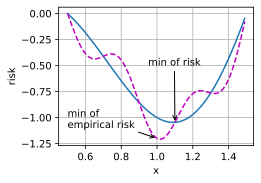

In [4]:
def annotate(text, xy, xytext): #@save
    d2l.plt.gca().annotate(text, xy=xy, xytext=xytext, 
                       arrowprops=dict(arrowstyle='->'))

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

In [5]:
%matplotlib inline 
import numpy as np 
import torch 
from mpl_toolkits import mplot3d 
from d2l import torch as d2l

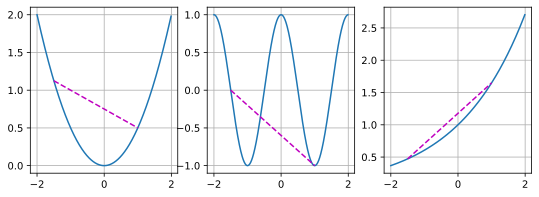

In [6]:
f = lambda x: 0.5 * x**2 # Convex 
g = lambda x: torch.cos(np.pi * x) # Nonconvex
h = lambda x: torch.exp(0.5 * x) # Convex
x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)

In [1]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

def f(x): # Objective function 
    return x ** 2

def f_grad(x):# Gradient (derivative) of the objective function
    return 2 * x

In [2]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta*f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results
results = gd(0.2, f_grad)

epoch 10, x: 0.060466


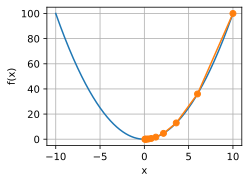

In [3]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results))) 
    f_line = torch.arange(-n, n, 0.01) 
    d2l.set_figsize() 
    d2l.plot([f_line, results], [[f(x) for x in f_line], 
                                 [ f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])
show_trace(results, f)

epoch 10, x: 3.486784


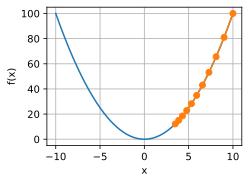

In [4]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


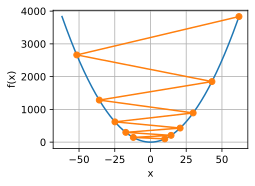

In [5]:
show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528166


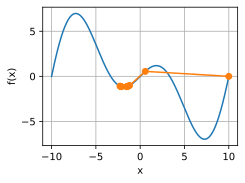

In [6]:
c = torch.tensor(0.15 * np.pi) 
def f(x): # Objective function
    return x * torch.cos(c * x) 
def f_grad(x): # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x) 
show_trace(gd(2, f_grad), f)

In [7]:
def train_2d(trainer, steps=20, f_grad=None):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}') 
    return results

In [8]:
def show_trace_2d(f, results):
    d2l.set_figsize() 
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e') 
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), torch.arange(-3.0, 1.0, 0.1), indexing='ij') 
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4') 
    d2l.plt.xlabel('x1') 
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


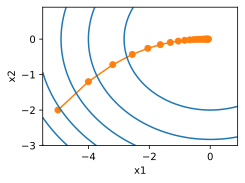

In [9]:
def f_2d(x1, x2): # Objective function 
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2): # Gradient of the objective function 
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2) 
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1 
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(0.)


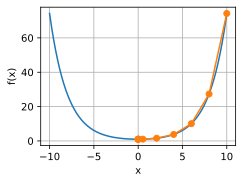

In [10]:
c = torch.tensor(0.5)

def f(x): # Objective function 
    return torch.cosh(c * x)

def f_grad(x): # Gradient of the objective function 
    return c * torch.sinh(c * x)

def f_hess(x): # Hessian of the objective function 
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0 
    results = [x] 
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x)) 
    print('epoch 10, x:', x) 
    return results

show_trace(newton(), f)

epoch 10, x: tensor(26.8341)


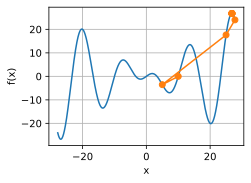

In [11]:
c = torch.tensor(0.15 * np.pi)

def f(x): # Objective function 
    return x * torch.cos(c * x)

def f_grad(x): # Gradient of the objective function 
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x): # Hessian of the objective function 
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


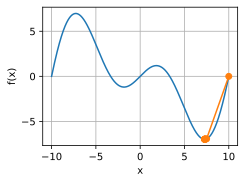

In [12]:
show_trace(newton(0.5), f)

In [13]:
def f(x1, x2): # Objective function 
    return x1 ** 2 + 2 * x2 ** 2

def f_grad(x1, x2): # Gradient of the objective function 
    return 2 * x1, 4 * x2

In [14]:
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2) 
    # Simulate noisy gradient 
    g1 += torch.normal(0.0, 1, (1,)).item() 
    g2 += torch.normal(0.0, 1, (1,)).item() 
    eta_t = eta * lr() 
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

epoch 50, x1: 0.155522, x2: -0.117950


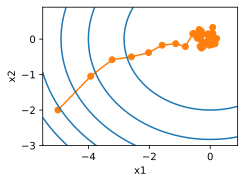

In [15]:
def constant_lr():
    return 1

eta = 0.1 
lr = constant_lr # Constant learning rate 
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

epoch 1000, x1: -0.900237, x2: 0.003396


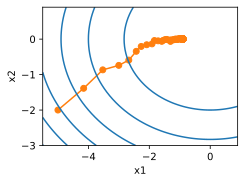

In [18]:
import math 
def exponential_lr():
    global t 
    t+= 1
    return math.exp(-0.1*t)

t = 1
lr = exponential_lr
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=1000, f_grad=f_grad))

epoch 50, x1: -0.075855, x2: 0.088970


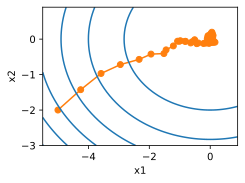

In [19]:
def polynomial_lr():
# Global variable that is defined outside this function and updated inside 
    global t 
    t += 1 
    return (1 + 0.1 * t) ** (-0.5)

t = 1 
lr = polynomial_lr 
d2l.show_trace_2d(f, d2l.train_2d(sgd, steps=50, f_grad=f_grad))

In [4]:
%matplotlib inline 
import time 
import numpy as np 
import torch 
from torch import nn 
from d2l import torch as d2l

A = torch.zeros(256, 256) 
B = torch.randn(256, 256) 
C = torch.randn(256, 256)

In [6]:
class Timer: #@save
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """Start the timer.""" 
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list.""" 
        self.times.append(time.time() - self.tik) 
        return self.times[-1]

    def avg(self):
        """Return the average time.""" 
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time.""" 
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time.""" 
        return np.array(self.times).cumsum().tolist()

timer = Timer()

In [7]:
# Compute A = BC one element at a time 
timer.start() 
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

1.5465126037597656

In [8]:
# Compute A = BC one column at a time 
timer.start() 
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j]) 
timer.stop()

0.010253667831420898

In [9]:
# Compute A = BC in one go 
timer.start() 
A = torch.mm(B, C) 
timer.stop()

gigaflops = [0.03 / i for i in timer.times] 
print(f'performance in Gigaflops: element {gigaflops[0]:.3f}, ' f'column {gigaflops[1]:.3f}, full {gigaflops[2]:.3f}')

performance in Gigaflops: element 0.019, column 2.926, full 7.754


In [10]:
timer.start() 
for j in range(0, 256, 64):
    A[:, j:j+64] = torch.mm(B, C[:, j:j+64]) 
timer.stop() 
print(f'performance in Gigaflops: block {0.03 / timer.times[3]:.3f}')

performance in Gigaflops: block 1.292


In [15]:
d2l.DATA_HUB['airfoil'] = (d2l.DATA_URL + 'airfoil_self_noise.dat', '76e5be1548fd8222e5074cf0faae75edff8cf93f')

#@save

def get_data_ch11(batch_size=10, n=1500):
    data = np.genfromtxt(d2l.download('airfoil'), dtype=np.float32, delimiter='\t') 
    data = torch.from_numpy((data - data.mean(axis=0)) / data.std(axis=0))
    data_iter = d2l.load_array((data[:n, :-1], data[:n, -1]),
        batch_size, is_train=True) 
    return data_iter, data.shape[1]-1

In [16]:
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad) 
        p.grad.data.zero_()

In [17]:
def train_ch11(trainer_fn, states, hyperparams, data_iter, feature_dim, num_epochs=2):
    # Initialization
    w = torch.normal(mean=0.0, std=0.01, size=(feature_dim, 1),
        requires_grad=True) 
    b = torch.zeros((1), requires_grad=True) 
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss 
    #Train
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0, num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer() 
    for _ in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X), y).mean() 
            l.backward() 
            trainer_fn([w, b], states, hyperparams)
            n += X.shape[0]
            if n % 200 == 0:
                timer.stop()
            animator.add(n/X.shape[0]/len(data_iter), (d2l.evaluate_loss(net, data_iter, loss),)) 
            timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/,→ epoch')
    return timer.cumsum(), animator.Y[0]

loss: 0.246, 0.007 sec/,→ epoch


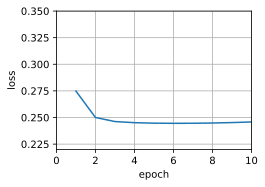

In [18]:
def train_sgd(lr, batch_size, num_epochs=2):
    data_iter, feature_dim = get_data_ch11(batch_size) 
    return train_ch11( sgd, None, {'lr': lr}, data_iter, feature_dim, num_epochs)

gd_res = train_sgd(1, 1500, 10)

loss: 0.243, 0.008 sec/,→ epoch


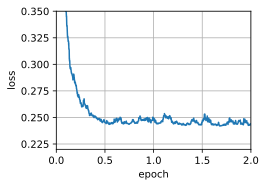

In [19]:
sgd_res = train_sgd(0.005, 1)

loss: 0.245, 0.019 sec/,→ epoch


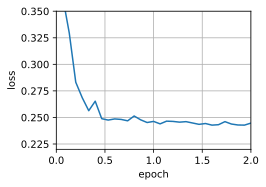

In [20]:
mini1_res = train_sgd(.4, 100)

loss: 0.243, 0.012 sec/,→ epoch


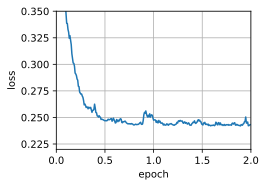

In [21]:
mini2_res = train_sgd(.05, 10)

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

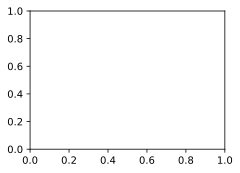

In [24]:
d2l.set_figsize([6, 3]) 
d2l.plot(*list(map(list, zip(gd_res, sgd_res, mini1_res, mini2_res))), 'time (sec)', 'loss', xlim=[1e-2, 10], legend=['gd', 'sgd', 'batch size=100', 'batch size=10'])
d2l.plt.gca().set_xscale('log')

In [25]:
def train_concise_ch11(trainer_fn, hyperparams, data_iter, num_epochs=4):
    #initialization
    net = nn.Sequential(nn.Linear(5, 1))
    def init_weights(module):
        if type(module) == nn.Linear:
            torch.nn.init.normal_(module.weight, std=0.01)
    net.apply(init_weights) # weights
    
    optimizer = trainer_fn(net.parameters(), **hyperparams)
    loss = nn.MSELoss(reduction='none')
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[0,num_epochs], ylim=[0.22, 0.35])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for X, y in data_iter:
            optimizer.zero_grad()
            out = net(X)
            y = y.reshape(out.shape)
            l = loss(out, y)
            l.mean().backward()
            optimizer.step()
            n += X.shape[0]
            if n%200==0:
                timer.stop()
                animator.add(n/X.shape[0]/len(data_iter),
                             (d2l.evaluate_loss(net, data_iter, loss)/2,))
                timer.start()
    print(f'loss: {animator.Y[0][-1]:.3f}, {timer.sum()/num_epochs:.3f} sec/ ,→epoch')

loss: 0.243, 0.096 sec/ ,→epoch


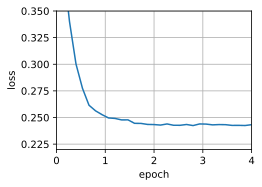

In [26]:
data_iter, _ = get_data_ch11(10) 
trainer = torch.optim.SGD 
train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

epoch 20, x1: -0.943467, x2: -0.000073


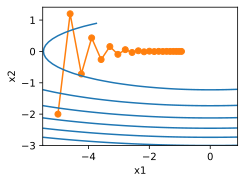

In [27]:
%matplotlib inline 
import torch 
from d2l import torch as d2l

eta = 0.4 
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2 
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


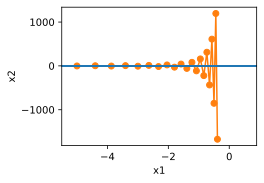

In [31]:
eta = 0.6 
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: 0.007188, x2: 0.002553


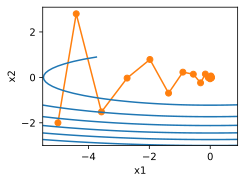

In [33]:
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1 
    v2 = beta * v2 + 4 * x2 
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5 
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


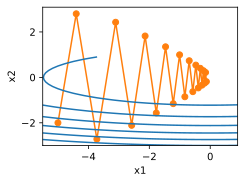

In [35]:
eta, beta = 0.6, 0.25 
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

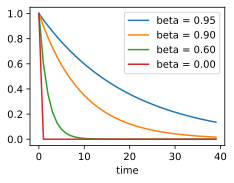

In [36]:
d2l.set_figsize()
betas = [0.95, 0.9, 0.6, 0]
for beta in betas:
    x = torch.arange(40).detach().numpy() 
    d2l.plt.plot(x, beta ** x, label=f'beta = {beta:.2f}') 
d2l.plt.xlabel('time') 
d2l.plt.legend();

loss: 0.245, 0.112 sec/epoch


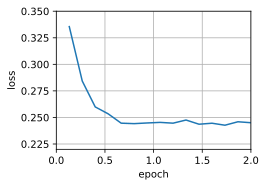

In [41]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1)) 
    v_b = torch.zeros(1) 
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum']*v + p.grad
            p[:] -= hyperparams['lr']*v
        p.grad.data.zero_()
        
def train_momentum(lr, momentum, num_epochs=2):
    d2l.train_ch11(sgd_momentum, init_momentum_states(feature_dim), 
                {'lr': lr, 'momentum': momentum}, data_iter, 
                feature_dim, num_epochs)

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10) 
train_momentum(0.02, 0.5)

loss: 0.252, 0.100 sec/epoch


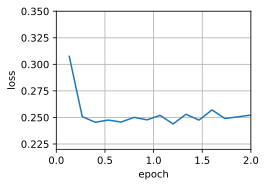

In [43]:
train_momentum(0.01, 0.9)

loss: 0.247, 0.094 sec/epoch


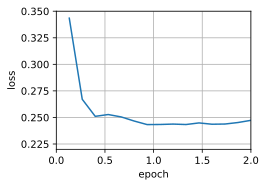

In [44]:
train_momentum(0.005, 0.9)

loss: 0.247, 0.092 sec/epoch


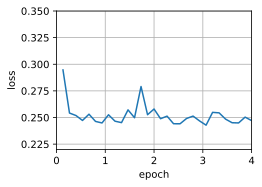

In [45]:
trainer = torch.optim.SGD 
d2l.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

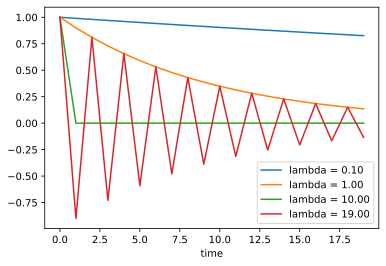

In [46]:
lambdas = [0.1, 1, 10, 19]
eta = 0.1
d2l.set_figsize((6, 4)) 
for lam in lambdas:
    t = torch.arange(20).detach().numpy()
    d2l.plt.plot(t, (1 - eta * lam) ** t, label=f'lambda = {lam:.2f}') 
d2l.plt.xlabel('time') 
d2l.plt.legend();

In [47]:
%matplotlib inline 
import math 
import torch 
from d2l import torch as d2l

epoch 20, x1: -2.382563, x2: -0.158591


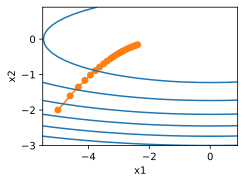

In [48]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6 
    g1, g2 = 0.2 * x1, 4 * x2 
    s1 += g1 ** 2 
    s2 += g2 ** 2 
    x1 -= eta / math.sqrt(s1 + eps) * g1 
    x2 -= eta / math.sqrt(s2 + eps) * g2 
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

eta = 0.4 
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


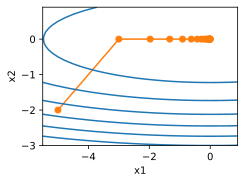

In [49]:
eta = 2 
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

loss: 0.242, 0.097 sec/epoch


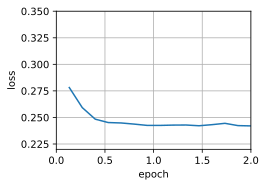

In [50]:
def init_adagrad_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams['lr']*p.grad/torch.sqrt(s+eps)
        p.grad.data.zero_()
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10) 
d2l.train_ch11(adagrad, init_adagrad_states(feature_dim), {'lr': 0.1}, data_iter, feature_dim);

loss: 0.242, 0.092 sec/epoch


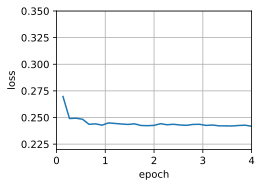

In [51]:
trainer = torch.optim.Adagrad 
d2l.train_concise_ch11(trainer, {'lr': 0.1}, data_iter)

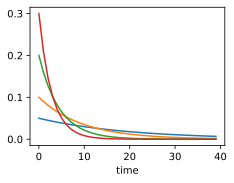

In [52]:
import math 
import torch 
from d2l import torch as d2l

d2l.set_figsize() 
gammas = [0.95, 0.9, 0.8, 0.7] 
for gamma in gammas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(x, (1-gamma) * gamma ** x, label=f'gamma = {gamma:.2f}') 
d2l.plt.xlabel('time');

epoch 20, x1: -0.010599, x2: 0.000000


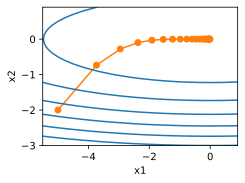

In [53]:
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1 
    x2 -= eta / math.sqrt(s2 + eps) * g2 
    return x1, x2, s1, s2

def f_2d(x1, x2):
    return 0.1*x1**2+2*x2**2

eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [55]:
def init_rmsprop_states(feature_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma*s + (1-gamma)*torch.square(p.grad)
            p[:] -= hyperparams['lr']*p.grad/torch.sqrt(s+eps)
        p.grad.data.zero_()

loss: 0.243, 0.097 sec/epoch


([0.018088579177856445,
  0.03251075744628906,
  0.046309709548950195,
  0.05849409103393555,
  0.07074356079101562,
  0.0829474925994873,
  0.09518885612487793,
  0.10779452323913574,
  0.1200571060180664,
  0.13219881057739258,
  0.1444988250732422,
  0.15700864791870117,
  0.16940736770629883,
  0.18151450157165527,
  0.1939704418182373],
 [0.3415208958983421,
  0.29050604033470157,
  0.26885002064704894,
  0.2520644330978394,
  0.24560365915298463,
  0.2466568387746811,
  0.24648241142431895,
  0.24441642330090205,
  0.24492805645863217,
  0.24553042459487914,
  0.2432802015344302,
  0.24265077777703603,
  0.24390963915983835,
  0.24337018076578776,
  0.2428194568157196])

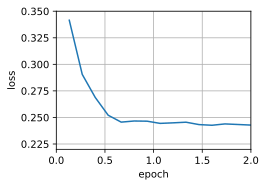

In [56]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(rmsprop, init_rmsprop_states(feature_dim),
               {'lr': 0.01, 'gamma':0.9}, data_iter, feature_dim)

loss: 0.243, 0.092 sec/epoch


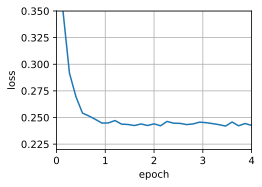

In [57]:
trainer = torch.optim.RMSprop
d2l.train_concise_ch11(trainer, {'lr':0.01, 'alpha':0.9}, data_iter)

In [61]:
%matplotlib inline
import torch 
from d2l import torch as d2l

def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            s[:] = rho * s + (1 - rho) * torch.square(p.grad)
            g = (torch.sqrt(delta+eps)/torch.sqrt(s+eps))*p.grad
            p[:] -= g
            delta[:] = rho * delta + (1-rho)*g*g
        p.grad.data.zero_()
        

loss: 0.243, 0.105 sec/epoch


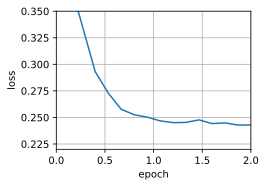

In [62]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10) 
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim), {'rho': 0.9}, data_iter, feature_dim);

loss: 0.243, 0.098 sec/epoch


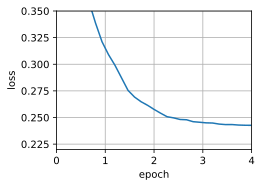

In [63]:
trainer = torch.optim.Adadelta 
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)

In [64]:
%matplotlib inline 
import torch 
from d2l import torch as d2l

def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1) 
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1) 
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1-beta1)*p.grad
            s[:] = beta2 * s + (1-beta2)*torch.square(p.grad)
            v_bias_corr = v/(1-beta1**hyperparams['t'])
            s_bias_corr = s/(1-beta2**hyperparams['t'])
            p[:] -= hyperparams['lr']*v_bias_corr/(torch.sqrt(s_bias_corr)+eps)
        p.grad.data.zero_()
    hyperparams['t']+=1

loss: 0.243, 0.112 sec/epoch


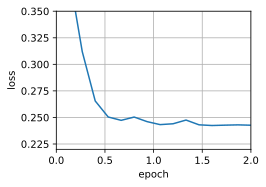

In [65]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10) 
d2l.train_ch11(adam, init_adam_states(feature_dim), {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.246, 0.103 sec/epoch


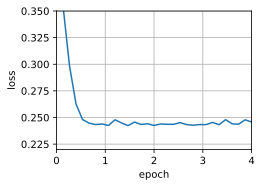

In [66]:
trainer = torch.optim.Adam 
d2l.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

loss: 0.243, 0.114 sec/epoch


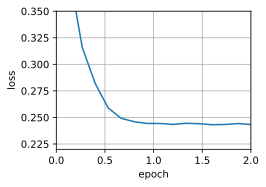

In [68]:
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad 
            s[:] = s + (1 - beta2) * torch.sign( torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr) + eps) 
            p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = d2l.get_data_ch11(batch_size=10) 
d2l.train_ch11(yogi, init_adam_states(feature_dim), {'lr': 0.01, 't': 1}, data_iter, feature_dim);

In [70]:
%matplotlib inline 
import math 
import torch 
from torch import nn 
from torch.optim import lr_scheduler 
from d2l import torch as d2l

def net_fn():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(), 
        nn.Linear(16 * 5 * 5, 120), 
        nn.ReLU(), 
        nn.Linear(120, 84), 
        nn.ReLU(), 
        nn.Linear(84, 10))
    return model

loss = nn.CrossEntropyLoss() 
device = d2l.try_gpu()
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# The code is almost identical to `d2l.train_ch6` defined in the
# lenet section of chapter convolutional neural networks
def train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler=None):
    net.to(device)
    animator = d2l.Animator(xlabel='epoch', xlim=[0, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)  # train_loss, train_acc, num_examples
        for i, (X, y) in enumerate(train_iter):
            net.train()
            trainer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(epoch + i / len(train_iter),
                             (train_loss, train_acc, None))
        test_acc = d2l.evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))

        if scheduler:
            if scheduler.__module__ == lr_scheduler.__name__:
                # Using PyTorch In-Built scheduler
                scheduler.step()
            else:
                # Using custom defined scheduler
                for param_group in trainer.param_groups:
                    param_group['lr'] = scheduler(epoch)

    print(f'train loss {train_loss:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')

train loss 0.127, train acc 0.952, test acc 0.880


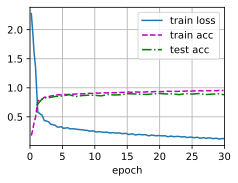

In [71]:
lr, num_epochs = 0.3, 30 
net = net_fn() 
trainer = torch.optim.SGD(net.parameters(), lr=lr) 
train(net, train_iter, test_iter, num_epochs, loss, trainer, device)

In [72]:
lr = 0.1 
trainer.param_groups[0]["lr"] = lr 
print(f'learning rate is now {trainer.param_groups[0]["lr"]:.2f}')

learning rate is now 0.10


In [73]:
class SquareRootScheduler:
    def __init__(self, lr=0.1):
        self.lr = lr

    def __call__(self, num_update):
        return self.lr * pow(num_update + 1.0, -0.5)

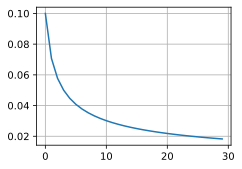

In [74]:
scheduler = SquareRootScheduler(lr=0.1) 
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

train loss 0.272, train acc 0.901, test acc 0.883


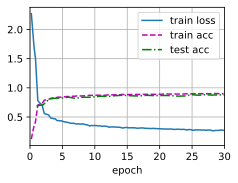

In [75]:
net = net_fn() 
trainer = torch.optim.SGD(net.parameters(), lr) 
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

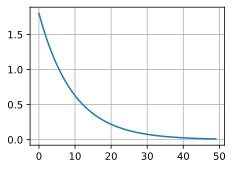

In [76]:
class FactorScheduler:
    def __init__(self, factor=1, stop_factor_lr=1e-7, base_lr =0.1):
        self.factor = factor 
        self.stop_factor_lr = stop_factor_lr 
        self.base_lr = base_lr
    def __call__(self, num_update):
        self.base_lr = max(self.stop_factor_lr, self.base_lr * self.factor) 
        return self.base_lr
    
scheduler = FactorScheduler(factor=0.9, stop_factor_lr=1e-2, base_lr=2.0)
d2l.plot(torch.arange(50), [scheduler(t) for t in range(50)])

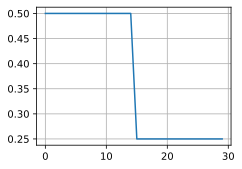

In [77]:
net = net_fn() 
trainer = torch.optim.SGD(net.parameters(), lr=0.5) 
scheduler = lr_scheduler.MultiStepLR(trainer, milestones=[15, 30], gamma=0.5)

def get_lr(trainer, scheduler):
    lr = scheduler.get_last_lr()[0]
    trainer.step()
    scheduler.step()
    return lr

d2l.plot(torch.arange(num_epochs), [get_lr(trainer, scheduler) for t in range(num_epochs)])

train loss 0.192, train acc 0.929, test acc 0.891


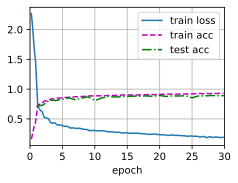

In [78]:
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

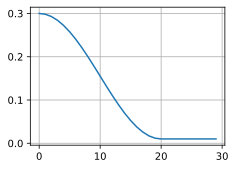

In [80]:
class CosineScheduler:
    def __init__(self, max_update, base_lr=0.01, final_lr=0,
        warmup_steps=0, warmup_begin_lr=0):
            self.base_lr_orig = base_lr 
            self.max_update = max_update 
            self.final_lr = final_lr 
            self.warmup_steps = warmup_steps 
            self.warmup_begin_lr = warmup_begin_lr 
            self.max_steps = self.max_update - self.warmup_steps
            
    def get_warmup_lr(self, epoch):
        increase = (self.base_lr_orig - self.warmup_begin_lr) * float(epoch) / float(self.warmup_steps) 
        return self.warmup_begin_lr + increase
    
    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch) 
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + ( self.base_lr_orig - self.final_lr) * (1 + math.cos( math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2 
        return self.base_lr
    
scheduler = CosineScheduler(max_update=20, base_lr=0.3, final_lr=0.01)
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

train loss 0.170, train acc 0.938, test acc 0.902


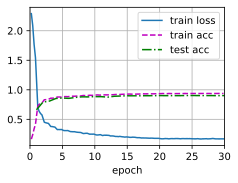

In [81]:
net = net_fn() 
trainer = torch.optim.SGD(net.parameters(), lr=0.3) 
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)

train loss 0.205, train acc 0.924, test acc 0.897


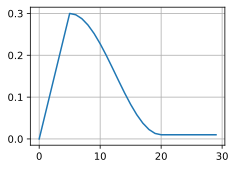

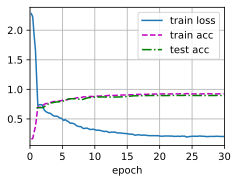

In [82]:
scheduler = CosineScheduler(20, warmup_steps=5, base_lr=0.3, final_lr=0.01) 
d2l.plot(torch.arange(num_epochs), [scheduler(t) for t in range(num_epochs)])

net = net_fn() 
trainer = torch.optim.SGD(net.parameters(), lr=0.3) 
train(net, train_iter, test_iter, num_epochs, loss, trainer, device, scheduler)